# Analyse du Dataset Madrid Housing

Ce notebook permet d'analyser le dataset des propriétés immobilières de Madrid (District Villaverde).

In [2]:
# Imports nécessaires
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajouter le chemin des scripts
sys.path.append('/Users/antoinegobbe/Desktop/Plateforme/apartment-hunter/scripts')
from analyze_distribution import analyze_column_distribution

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Imports réussis")

✅ Imports réussis


## 1. Chargement et aperçu des données

In [3]:
# Charger le dataset
filepath = "/Users/antoinegobbe/Desktop/Plateforme/apartment-hunter/data/houses_Madrid.csv"
df = pd.read_csv(filepath)

print(f"Nombre de lignes: {len(df)}")
print(f"Nombre de colonnes: {len(df.columns)}")
print("\n" + "="*80)
print("Aperçu des premières lignes:")
df.head()

Nombre de lignes: 21742
Nombre de colonnes: 58

Aperçu des premières lignes:


,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


## 2. Informations sur les types de données

In [4]:
# Vérifier les types des colonnes principales
print("=== TYPES DES COLONNES PRINCIPALES ===")
print(f"buy_price: {df['buy_price'].dtype}")
print(f"sq_mt_built: {df['sq_mt_built'].dtype}")
print(f"n_rooms: {df['n_rooms'].dtype}")
print(f"n_bathrooms: {df['n_bathrooms'].dtype}")
print(f"neighborhood_id: {df['neighborhood_id'].dtype}")

print("\n=== NOMBRE DE VALEURS UNIQUES ===")
print(f"buy_price: {df['buy_price'].nunique()} valeurs uniques")
print(f"sq_mt_built: {df['sq_mt_built'].nunique()} valeurs uniques")
print(f"n_rooms: {df['n_rooms'].nunique()} valeurs uniques")
print(f"neighborhood_id: {df['neighborhood_id'].nunique()} valeurs uniques")

=== TYPES DES COLONNES PRINCIPALES ===
buy_price: int64
sq_mt_built: float64
n_rooms: int64
n_bathrooms: float64
neighborhood_id: object

=== NOMBRE DE VALEURS UNIQUES ===
buy_price: 2403 valeurs uniques
sq_mt_built: 678 valeurs uniques
n_rooms: 19 valeurs uniques
neighborhood_id: 126 valeurs uniques


## 3. Analyse des valeurs manquantes

=== TOP 20 COLONNES AVEC LE PLUS DE VALEURS MANQUANTES ===

            Colonne  Valeurs_Manquantes  Pourcentage
has_private_parking               21742       100.00
               door               21742       100.00
             portal               21742       100.00
       is_furnished               21742       100.00
 rent_price_by_area               21742       100.00
          longitude               21742       100.00
           latitude               21742       100.00
 has_public_parking               21742       100.00
is_kitchen_equipped               21742       100.00
   are_pets_allowed               21742       100.00
    sq_mt_allotment               20310        93.41
           n_floors               20305        93.39
         has_garden               20186        92.84
        has_balcony               18421        84.73
    has_green_zones               17685        81.34
      is_accessible               17668        81.26
           has_pool               16571

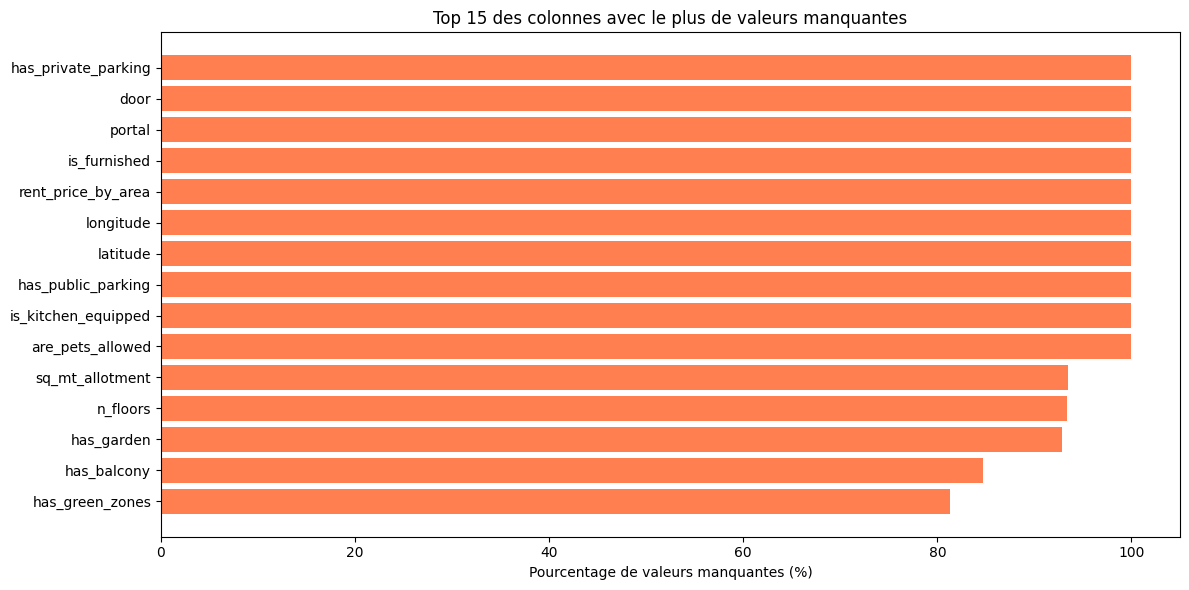

In [5]:
# Calculer les valeurs manquantes
missing_data = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs_Manquantes': df.isnull().sum().values,
    'Pourcentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

# Trier par pourcentage décroissant
missing_data = missing_data.sort_values('Pourcentage', ascending=False)

print("=== TOP 20 COLONNES AVEC LE PLUS DE VALEURS MANQUANTES ===\n")
print(missing_data.head(20).to_string(index=False))

# Visualisation
plt.figure(figsize=(12, 6))
top_missing = missing_data.head(15)
plt.barh(top_missing['Colonne'], top_missing['Pourcentage'], color='coral')
plt.xlabel('Pourcentage de valeurs manquantes (%)')
plt.title('Top 15 des colonnes avec le plus de valeurs manquantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 4. Analyse des quartiers (Variable catégorielle)

In [6]:
# Analyser la distribution des quartiers
print("=== DISTRIBUTION DES QUARTIERS ===\n")
analyze_column_distribution(filepath, 'neighborhood_id')

=== DISTRIBUTION DES QUARTIERS ===

ANALYSE DE DISTRIBUTION: neighborhood_id

Type de variable: object
Nombre de valeurs non-nulles: 21742
Nombre de valeurs manquantes: 0

--------------------------------------------------------------------------------
STATISTIQUES DESCRIPTIVES
--------------------------------------------------------------------------------
Nombre de catégories uniques: 126
Catégorie la plus fréquente: Neighborhood 23: Malasaña-Universidad (5196.25 €/m2) - District 4: Centro
Fréquence max: 485 (2.23%)

--------------------------------------------------------------------------------
DISTRIBUTION DES VALEURS (Top 20)
--------------------------------------------------------------------------------
 1. Neighborhood 23: Malasaña-Universidad (5196.25 €/m2) - District 4: Centro:   485 ( 2.23%)
 2. Neighborhood 59: Conde Orgaz-Piovera (4275.46 €/m2) - District 9: Hortaleza:   471 ( 2.17%)
 3. Neighborhood 28: El Viso (6255.45 €/m2) - District 5: Chamartín:   467 ( 2.15%)
 4. N

## 5. Analyse du prix d'achat (Variable numérique)

In [7]:
# Analyser le prix d'achat
print("=== DISTRIBUTION DES PRIX D'ACHAT ===\n")
analyze_column_distribution(filepath, 'buy_price')

=== DISTRIBUTION DES PRIX D'ACHAT ===

ANALYSE DE DISTRIBUTION: buy_price

Type de variable: int64
Nombre de valeurs non-nulles: 21742
Nombre de valeurs manquantes: 0

--------------------------------------------------------------------------------
STATISTIQUES DESCRIPTIVES
--------------------------------------------------------------------------------
Moyenne             : 653,735.65
Médiane             : 375,000.00
Écart-type          : 782,082.07
Minimum             : 36,000.00
Q1 (25%)            : 198,000.00
Q2 (50%)            : 375,000.00
Q3 (75%)            : 763,600.00
Maximum             : 8,800,000.00
Étendue             : 8,764,000.00

--------------------------------------------------------------------------------
DÉTECTION DES OUTLIERS (Méthode IQR)
--------------------------------------------------------------------------------

Q1 (25%): 198,000.00
Q3 (75%): 763,600.00
IQR: 565,600.00
Limite inférieure: -650,400.00
Limite supérieure: 1,612,000.00

Nombre d'outliers: 19

## 6. Analyse de la surface construite

In [8]:
# Analyser la surface construite
print("=== DISTRIBUTION DE LA SURFACE CONSTRUITE ===\n")
analyze_column_distribution(filepath, 'sq_mt_built')

=== DISTRIBUTION DE LA SURFACE CONSTRUITE ===

ANALYSE DE DISTRIBUTION: sq_mt_built

Type de variable: float64
Nombre de valeurs non-nulles: 21616
Nombre de valeurs manquantes: 126

--------------------------------------------------------------------------------
STATISTIQUES DESCRIPTIVES
--------------------------------------------------------------------------------
Moyenne             : 146.92
Médiane             : 100.00
Écart-type          : 134.18
Minimum             : 13.00
Q1 (25%)            : 70.00
Q2 (50%)            : 100.00
Q3 (75%)            : 162.00
Maximum             : 999.00
Étendue             : 986.00

--------------------------------------------------------------------------------
DÉTECTION DES OUTLIERS (Méthode IQR)
--------------------------------------------------------------------------------

Q1 (25%): 70.00
Q3 (75%): 162.00
IQR: 92.00
Limite inférieure: -68.00
Limite supérieure: 300.00

Nombre d'outliers: 2228 (10.31%)
Valeurs outliers (min-max): 301.00 - 999

## 7. Analyse du nombre de chambres

In [9]:
# Analyser le nombre de chambres
print("=== DISTRIBUTION DU NOMBRE DE CHAMBRES ===\n")
analyze_column_distribution(filepath, 'n_rooms')

=== DISTRIBUTION DU NOMBRE DE CHAMBRES ===

ANALYSE DE DISTRIBUTION: n_rooms

Type de variable: int64
Nombre de valeurs non-nulles: 21742
Nombre de valeurs manquantes: 0

--------------------------------------------------------------------------------
STATISTIQUES DESCRIPTIVES
--------------------------------------------------------------------------------
Moyenne             : 3.01
Médiane             : 3.00
Écart-type          : 1.51
Minimum             : 0.00
Q1 (25%)            : 2.00
Q2 (50%)            : 3.00
Q3 (75%)            : 4.00
Maximum             : 24.00
Étendue             : 24.00

--------------------------------------------------------------------------------
DÉTECTION DES OUTLIERS (Méthode IQR)
--------------------------------------------------------------------------------

Q1 (25%): 2.00
Q3 (75%): 4.00
IQR: 2.00
Limite inférieure: -1.00
Limite supérieure: 7.00

Nombre d'outliers: 225 (1.03%)
Valeurs outliers (min-max): 8.00 - 24.00

Premiers outliers détectés:
531 

## 8. Statistiques descriptives globales

=== STATISTIQUES DESCRIPTIVES ===

          buy_price   sq_mt_built       n_rooms   n_bathrooms    built_year
count  2.174200e+04  21616.000000  21742.000000  21726.000000  10000.000000
mean   6.537356e+05    146.920892      3.005749      2.091687   1970.046400
std    7.820821e+05    134.181865      1.510497      1.406992     69.386705
min    3.600000e+04     13.000000      0.000000      1.000000   1723.000000
25%    1.980000e+05     70.000000      2.000000      1.000000   1957.000000
50%    3.750000e+05    100.000000      3.000000      2.000000   1970.000000
75%    7.636000e+05    162.000000      4.000000      2.000000   1994.000000
max    8.800000e+06    999.000000     24.000000     16.000000   8170.000000

=== MATRICE DE CORRÉLATION ===

             buy_price  sq_mt_built   n_rooms  n_bathrooms  built_year
buy_price     1.000000     0.832039  0.608893     0.772218    0.008514
sq_mt_built   0.832039     1.000000  0.715981     0.852856    0.056167
n_rooms       0.608893     0.715981

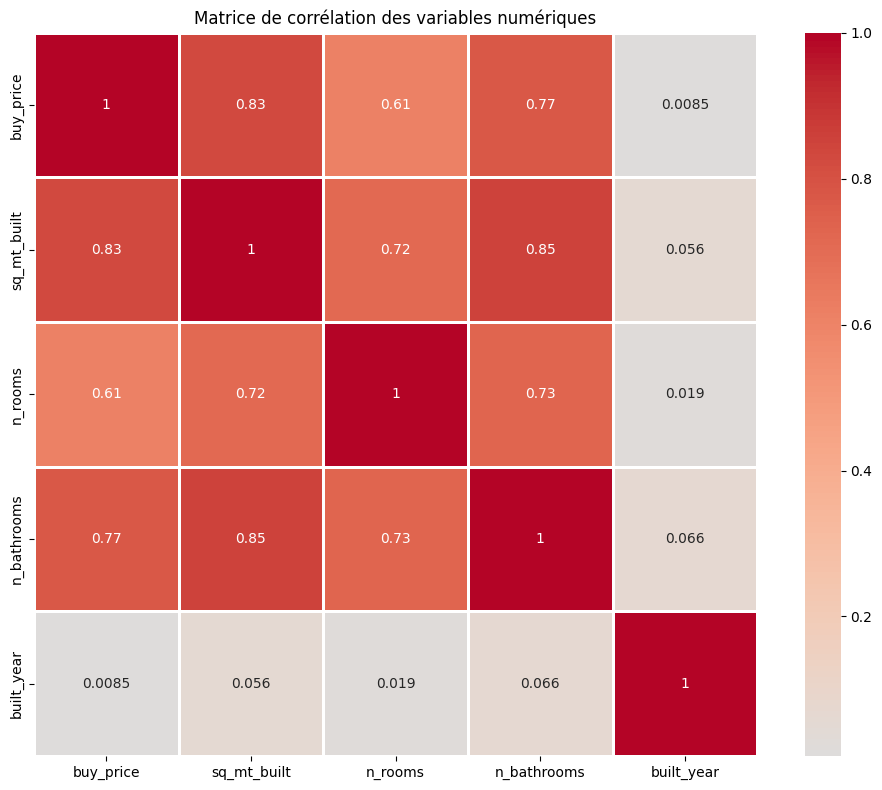

In [10]:
# Statistiques des variables numériques principales
print("=== STATISTIQUES DESCRIPTIVES ===\n")
numeric_cols = ['buy_price', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'built_year']
print(df[numeric_cols].describe())

# Corrélations
print("\n=== MATRICE DE CORRÉLATION ===\n")
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

# Visualisation de la corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

## 9. Analyse du certificat énergétique

In [11]:
# Analyser le certificat énergétique
print("=== DISTRIBUTION DU CERTIFICAT ÉNERGÉTIQUE ===\n")
analyze_column_distribution(filepath, 'energy_certificate')

=== DISTRIBUTION DU CERTIFICAT ÉNERGÉTIQUE ===

ANALYSE DE DISTRIBUTION: energy_certificate

Type de variable: object
Nombre de valeurs non-nulles: 21742
Nombre de valeurs manquantes: 0

--------------------------------------------------------------------------------
STATISTIQUES DESCRIPTIVES
--------------------------------------------------------------------------------
Nombre de catégories uniques: 10
Catégorie la plus fréquente: en trámite
Fréquence max: 10937 (50.30%)

--------------------------------------------------------------------------------
DISTRIBUTION DES VALEURS (Top 20)
--------------------------------------------------------------------------------
 1. en trámite                              : 10937 (50.30%)
 2. no indicado                             :  3669 (16.88%)
 3. E                                       :  2701 (12.42%)
 4. D                                       :  1121 ( 5.16%)
 5. G                                       :   894 ( 4.11%)
 6. F               

## 10. Analyse des types de logement

In [12]:
# Analyser les types de logement
print("=== DISTRIBUTION DES TYPES DE LOGEMENT ===\n")
analyze_column_distribution(filepath, 'house_type_id')

=== DISTRIBUTION DES TYPES DE LOGEMENT ===

ANALYSE DE DISTRIBUTION: house_type_id

Type de variable: object
Nombre de valeurs non-nulles: 21351
Nombre de valeurs manquantes: 391

--------------------------------------------------------------------------------
STATISTIQUES DESCRIPTIVES
--------------------------------------------------------------------------------
Nombre de catégories uniques: 4
Catégorie la plus fréquente: HouseType 1: Pisos
Fréquence max: 17705 (82.92%)

--------------------------------------------------------------------------------
DISTRIBUTION DES VALEURS (Top 20)
--------------------------------------------------------------------------------
 1. HouseType 1: Pisos                      : 17705 (82.92%)
 2. HouseType 2: Casa o chalet              :  1938 ( 9.08%)
 3. HouseType 5: Áticos                     :  1032 ( 4.83%)
 4. HouseType 4: Dúplex                     :   676 ( 3.17%)

✓ Graphiques sauvegardés dans: /Users/antoinegobbe/Desktop/Plateforme/apartment-

## 11. Relation Prix vs Surface

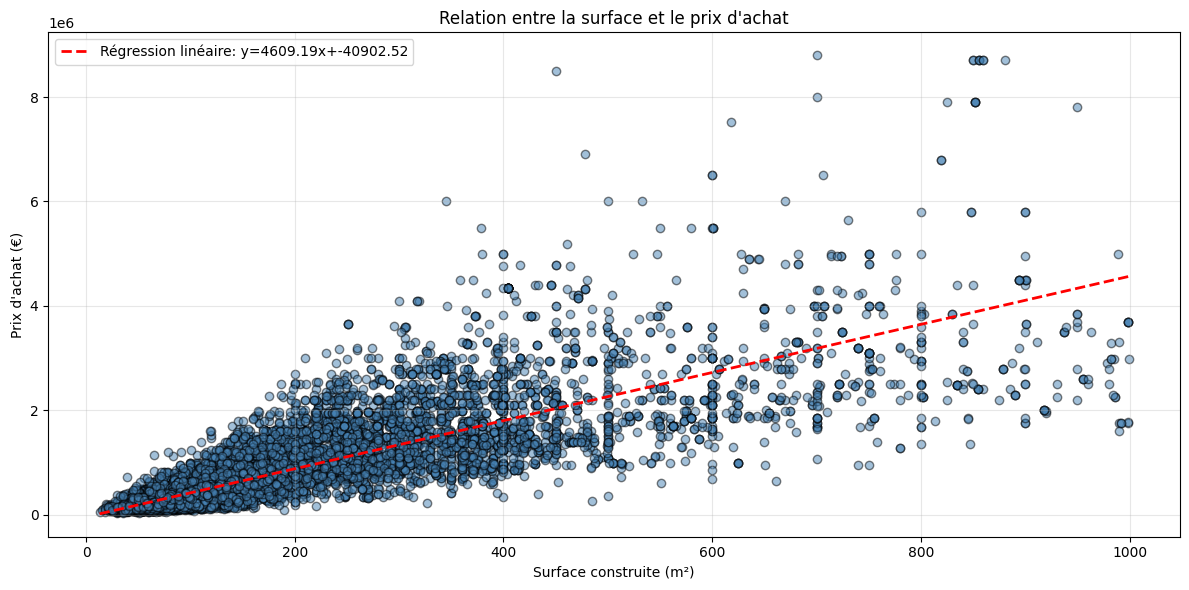

Coefficient de corrélation: 0.832


In [13]:
# Scatter plot: Prix vs Surface
plt.figure(figsize=(12, 6))
plt.scatter(df['sq_mt_built'], df['buy_price'], alpha=0.5, c='steelblue', edgecolors='black')
plt.xlabel('Surface construite (m²)')
plt.ylabel('Prix d\'achat (€)')
plt.title('Relation entre la surface et le prix d\'achat')
plt.grid(True, alpha=0.3)

# Ajouter une ligne de régression
z = np.polyfit(df['sq_mt_built'].dropna(), df['buy_price'][df['sq_mt_built'].notna()], 1)
p = np.poly1d(z)
plt.plot(df['sq_mt_built'].sort_values(), p(df['sq_mt_built'].sort_values()), 
         "r--", linewidth=2, label=f'Régression linéaire: y={z[0]:.2f}x+{z[1]:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Coefficient de corrélation: {df['sq_mt_built'].corr(df['buy_price']):.3f}")

## 12. Résumé et recommandations

In [14]:
print("="*80)
print("RÉSUMÉ DE L'ANALYSE")
print("="*80)

print(f"\n📊 Dataset: {len(df)} propriétés")
print(f"📍 Localisation: District 21 (Villaverde), Madrid")
print(f"🏘️  Nombre de quartiers: {df['neighborhood_id'].nunique()}")

print("\n💰 Prix d'achat:")
print(f"  - Minimum: {df['buy_price'].min():,.0f} €")
print(f"  - Maximum: {df['buy_price'].max():,.0f} €")
print(f"  - Médiane: {df['buy_price'].median():,.0f} €")
print(f"  - Moyenne: {df['buy_price'].mean():,.0f} €")

print("\n📏 Surface construite:")
print(f"  - Minimum: {df['sq_mt_built'].min():.0f} m²")
print(f"  - Maximum: {df['sq_mt_built'].max():.0f} m²")
print(f"  - Médiane: {df['sq_mt_built'].median():.0f} m²")
print(f"  - Moyenne: {df['sq_mt_built'].mean():.0f} m²")

print("\n⚠️  POINTS D'ATTENTION:")
print(f"  - Coordonnées GPS manquantes: 100% (limitation majeure)")
print(f"  - Surface utile manquante: {(df['sq_mt_useful'].isnull().sum()/len(df)*100):.1f}%")
print(f"  - Année de construction manquante: {(df['built_year'].isnull().sum()/len(df)*100):.1f}%")

print("\n✅ PROCHAINES ÉTAPES RECOMMANDÉES:")
print("  1. Imputation ou suppression des valeurs manquantes critiques")
print("  2. Détection et traitement des outliers (prix et surface)")
print("  3. Feature engineering: prix au m², âge du bien, etc.")
print("  4. Encodage des variables catégorielles")
print("  5. Normalisation des variables numériques pour la modélisation")

RÉSUMÉ DE L'ANALYSE

📊 Dataset: 21742 propriétés
📍 Localisation: District 21 (Villaverde), Madrid
🏘️  Nombre de quartiers: 126

💰 Prix d'achat:
  - Minimum: 36,000 €
  - Maximum: 8,800,000 €
  - Médiane: 375,000 €
  - Moyenne: 653,736 €

📏 Surface construite:
  - Minimum: 13 m²
  - Maximum: 999 m²
  - Médiane: 100 m²
  - Moyenne: 147 m²

⚠️  POINTS D'ATTENTION:
  - Coordonnées GPS manquantes: 100% (limitation majeure)
  - Surface utile manquante: 62.2%
  - Année de construction manquante: 54.0%

✅ PROCHAINES ÉTAPES RECOMMANDÉES:
  1. Imputation ou suppression des valeurs manquantes critiques
  2. Détection et traitement des outliers (prix et surface)
  3. Feature engineering: prix au m², âge du bien, etc.
  4. Encodage des variables catégorielles
  5. Normalisation des variables numériques pour la modélisation


## 📝 Notes

**Graphiques générés:**
- Les graphiques de distribution sont sauvegardés dans le dossier `data/`
- Fichiers: `buy_price_distribution.png`, `sq_mt_built_distribution.png`, etc.

**Pour filtrer les outliers détectés:**
```python
# Exemple pour buy_price
Q1 = df['buy_price'].quantile(0.25)
Q3 = df['buy_price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['buy_price'] >= Q1 - 1.5*IQR) & (df['buy_price'] <= Q3 + 1.5*IQR)]
```